# Machine Learning and "Data Science": 


When you hear the term "data science" you likely will think coding and machine learning. That's absolutely not wrong, but what is at the core of this field of study? 

## Statistics! 
First and foremost, beyond just coding, a vast majority of "data science" is (simply put) statistics.  For this tutorial we won't dig too deeply into the weeds of statistics, but if you do enjoy the topic and want to continue on, freeCodeCamp has an entire condensed course in [statistics](https://www.youtube.com/watch?v=xxpc-HPKN28)  (not everything, but a great place to start) as well as an introductory course in [linear algebra](https://www.youtube.com/watch?v=JnTa9XtvmfI) (absolutely necessary for machine learning). 

## Why is statistics relevant? 
Beyond just understanding the intuition behind our algorithms, having a good understanding of statistical probabilities is significantly worthwhile to creating relevant models.   

Imagine we have a dataset of hospital patients and we're trying to find out if a person has a very rare form of cancer that only 1 in every million people have. We train our model on the dataset and we see that we're getting 99.99% accurate. That's amazing, right? 

Is it? Given our 99.99% accuracy, out of 1,000,000 we get their diagnoses correct for 999,900 people. In that case, we're telling 100 people they have cancer when they really don't. Additionally, we could make our model even more accurate by just returning "no cancer" for all 1,000,000 subjects. Now our model is 99.9999% accurate! 

For this tutorial we won't get into any of the weeds of how to correct for this or the workings of Receiver Operating Curves (ROC) (True positive, False positive, True negative, False negative), but ultimately it is absolutely necessary that these things be considered when creating scientific and production models, and having a good background in statistics can thoroughly help you on your journey to become a data scientist / machine learning engineer! 



## What the heck is machine learning? 
![ML](https://www.researchgate.net/profile/Nur-Abdul-Wahab-4/publication/354720249/figure/fig1/AS:1070394547122177@1632213355627/The-illustration-of-the-relationship-between-neural-network-deep-learning-machine.png)

Machine Learning (ML) is a subset of "Artificial Intelligence" (AI) that relies heavily on statistical methods that let the model "learn" from a particular dataset. There are a significant number of subfields of ML, but we can break up "ML" into two categories of algorithms: 
- **Supervised**: 
    - We tell the algorithm what is true and what is false from a sample dataset, it learns how to distinguish between those parameters
- **Unsupervised**
    - We give the algorithm a handful of parameters about how we might think the dataset is partitioned, and then we say "go wild and find results!" 
    
One of the key points in machine learning is learning how and whent to apply these methods! 

## Getting our Hands Dirty: 
We can sit here and discuss the finer points of machine learning all day long, but without seeing it in action, it's a bit nebulous to grasp. SO with that being the case, we'll use an exceptionally common test dataset (a bit macabre, but extremely interesting): 

**The Titanic Passenger dataset.**

### Loading Data
In a Kaggle environment: to load our data, on the righthand side of our screen, select `add data` and type `Titanic`

Selecting almost any titanic dataset ought to work, but to make sure we're all on the same page, select the [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic) dataset. 

Once our data are loaded to our workspace, you ought to see a `titanic` directory under the `input` header. 

Note: If you're doing this on your local machine, simply download the dataset and place it within the directory that you plan on using. 

### Reading Data
Now that we have our data, we need to read it in. First and foremost we'll need to import two essential libraries: `os` (for navigating the file structure) and `pandas` (a dataframe library): 

In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

path = '/kaggle/input/titanic'

for filename in os.listdir(path):
    print(f"{path}/{filename}")

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


We can see that we have 3 files in our mounted directory: 
- `train.csv`
- `test.csv`
- `gender_submission.cvs`

Because we've loaded this dataset from another repository, an additional submission file exists (`gender_submission.csv`), which we'll choose to ignore. 

The dataset has already been partitioned into a **training** set and a **testing** set, which makes it easier for us to use supervised learning methods. 

First, let's load in our `train` and `test` sets and see what they look like: 

In [4]:
train_df = pd.read_csv(f"{path}/train.csv")
test_df = pd.read_csv(f"{path}/test.csv")

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Getting a look at the above data, we can get a general idea of what teh columns mean. However, there are a few that might not be immediately discernable: 
- Pclass: The class of the passenger
- SibSp:  Number of Siblings/Spouses Aboard
- Parch: Number of Parents/Children Aboard
- Embarked: The port from which the passenger embarked


Note: It's not always easy to distinguish what some columns are named when pulling data from other sources.

### Test has no `survived`? 
It looks like our test dataframe has no `survived` column? Why is that? This is known as a validation set. It is a dataset in which data are intentionally removed so that persons competing against each other can be scored.  

For our sake, then, we will just use the `train` dataset and split with a train/test/split. 


## Why is this train / test split similarity necessary? 
We want to make sure that our data that we train on are actually relevant to the test set. It's a little hard to see how this really matters when using dataframes, but biasing your models can have real world [consequences](https://codete.com/blog/ai-gone-wrong-common-neural-network-training-mistakes-and-how-to-avoid-them). 



# ML Models: 
For our ML models, we need to split our data sets into an `X` dataset and a `y` target vector (i.e. what we want to predict).  

Let's see how well our data correlate:

<AxesSubplot:>

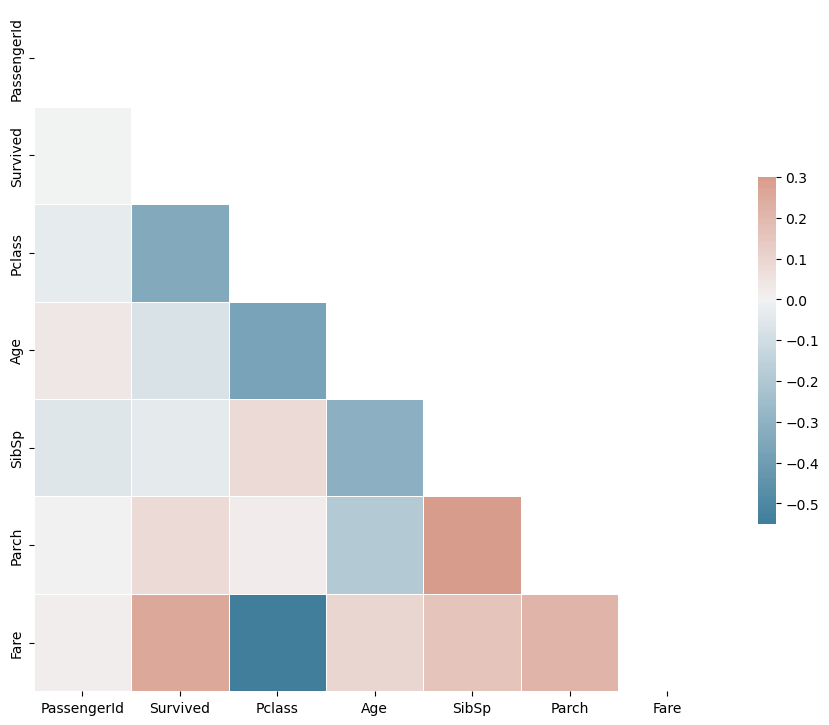

In [56]:
import numpy as np

corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

So, we'll need to select the columns we wish to use to predict against. Let's choose `survived` as our y vector, since our correlation map above looks pretty clear that we've got some strong correlations between survival and fare / class.

In [34]:
X_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
y_column = 'Survived'

X = train_df[X_columns]
y = train_df[y_column]

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [21]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Using Illustrations to See what's going on: 
Now that we've loaded our data, let's see what's going on in each dataset. Preferably, we'd expect to see similar distributions for all of our data in the train and test sets. Let's check.

For this we'll use `matplotlib` and `seaborn`: 

In [25]:
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # a pandas specific plotting library

def plot_train_vs_test(train,test, feature): 
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Titanic Data: {feature}")
    sns.histplot(data=train, x= feature, ax=axes[0])
    axes[0].title.set_text('Train')
    sns.histplot(data=test, x= feature, ax=axes[1])
    axes[1].title.set_text('Test')

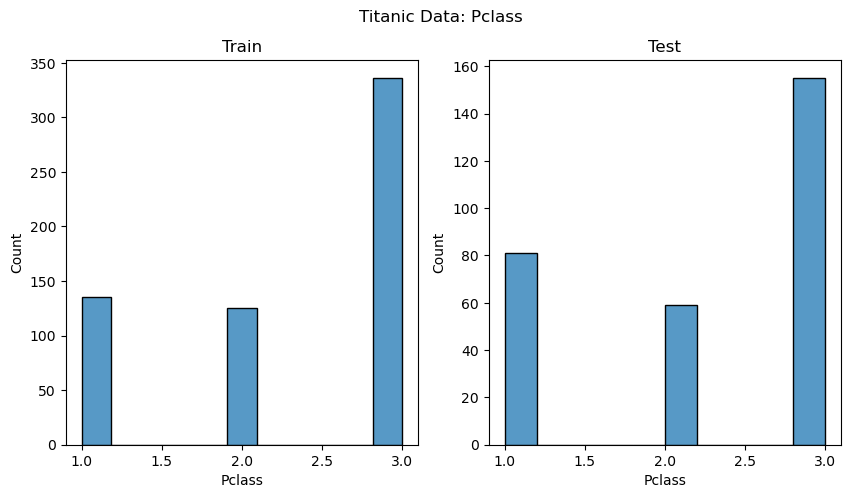

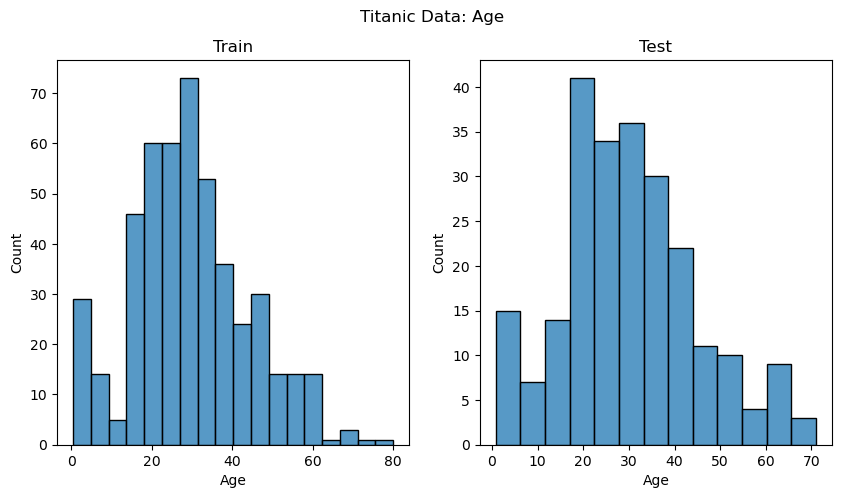

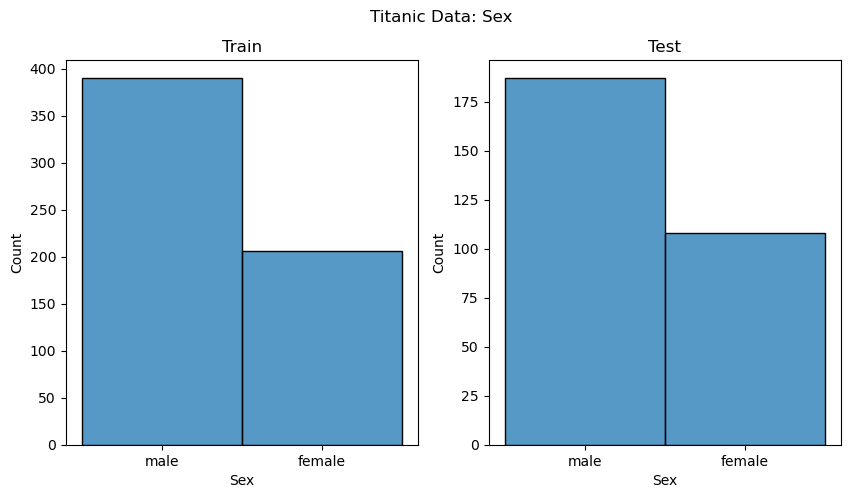

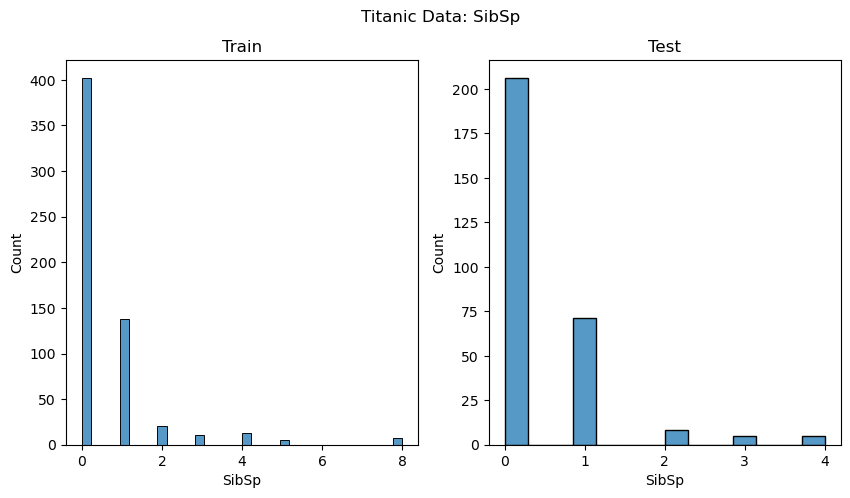

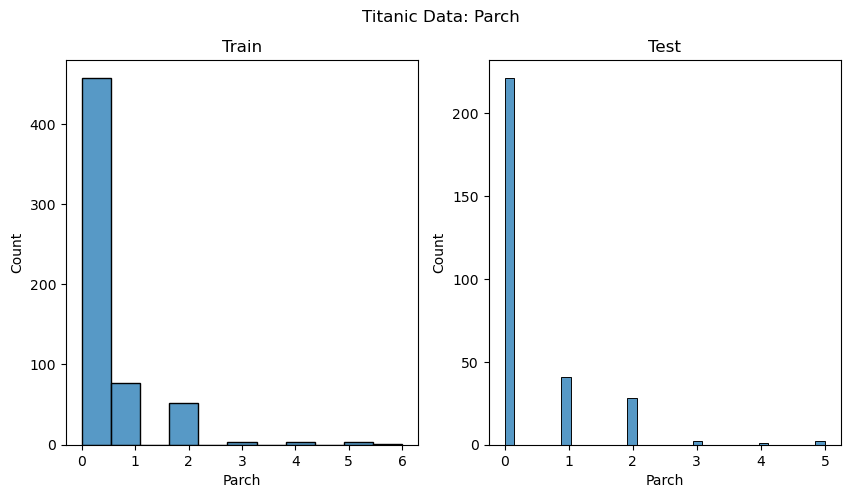

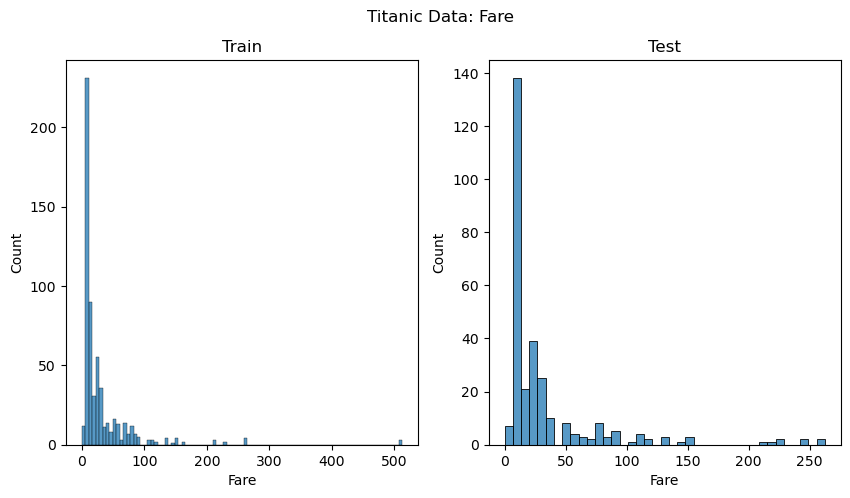

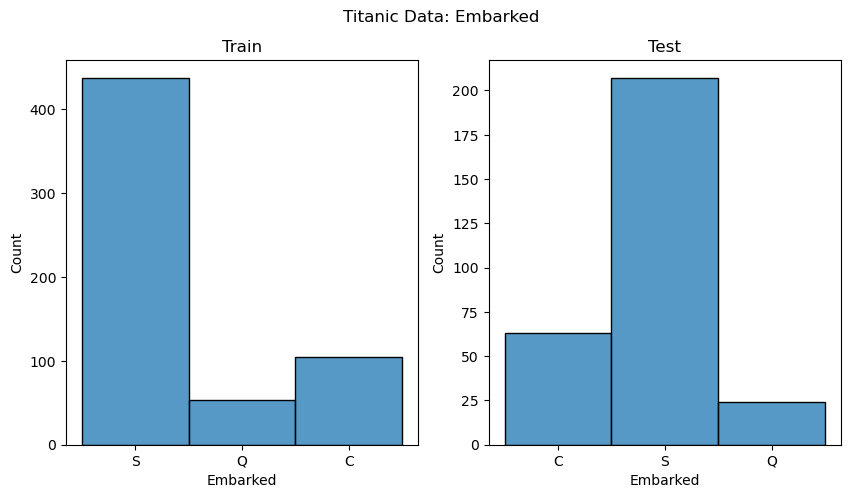

In [26]:
plot_train_vs_test(X_train, X_test, 'Pclass')
plot_train_vs_test(X_train, X_test, 'Age')
plot_train_vs_test(X_train, X_test, 'Sex')
plot_train_vs_test(X_train, X_test, 'SibSp')
plot_train_vs_test(X_train, X_test, 'Parch')
plot_train_vs_test(X_train, X_test, 'Fare')
plot_train_vs_test(X_train, X_test, 'Embarked')


Looking at the above plots, we can see that almost all of our features appear to be very similar in our train test split (except for our embarked*). All in all, this is pretty great! 


## Creating a ML Model: 
Your ultimate goal when doing machine learning is to create a model that understands your data.  Before we set out to working with our own dataset, imagine we have a dataframe with 2 columns of data points (height and width) and whether or not our row's measurements come from `apples` or `oranges`. 

Let's plot those 2 coordinates into cartesian coordinates: 

![plot](https://python-course.eu/images/machine-learning/line_separation0.webp) 

We can see that the apples' (yellow) and the oranges' (orange) respective data points appear to be pretty distinct.  

All machine learning is doing is drawing a line between the known values and saying "everything north of this line is an apple and everything south is an orange!"

![line](https://python-course.eu/images/machine-learning/separating-classes-with-dividing-lines_3.webp)

Now, the way that this happens algorithmically differs a lot between the different models out there, but ultimately, we're just trying to separate the data. 

# K Nearest Neighbor (KNN)

Using K nearest neighbors, we plot our data into the "search space" (the space our data set fits into), and then for each datapoint, we calculate their nearest neighbors. 


When we run our tests on our dataset, we plot the data, and then predict based off of the number of nearest neighbors that have the same class. 

![knn](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.xl.ts=1653407890466.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/intro/complex_narrative/items/content_group/image)

Let's try this with our data! 

In [30]:
from sklearn.neighbors import KNeighborsClassifier

neighbors_k5 = KNeighborsClassifier(n_neighbors=5)

neighbors_k5.fit(X_train,y_train)

ValueError: could not convert string to float: 'male'

OH NO! Clearly something went wrong. Thankfully, we got this error message: 
ValueError: could not convert string to float: 'male'

That gives us a clue. Most machine learning algorithms do a ton of heavy lifting for us already, but they don't convert data. That's on us. SO, we need to convert our data to be numerical. To do this, we'll "one hot" encode our data: 

In [37]:
X = pd.get_dummies(train_df[X_columns])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now, let's try this again: 

In [38]:
neighbors_k5 = KNeighborsClassifier(n_neighbors=5)

neighbors_k5.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Now what happened? We have NaN's (Not a Number*)? As it turns out, also, our models don't love handling data that don't exist, so, let's further refine our dataset. 

In [42]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [44]:
X.dropna()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,1,0,0,1,0
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In the above, we can see that our original dataset had 891 rows of data. By dropping out all missing data, we reduced our dataset to 714 samples. Thankfully, we still have a large enough dataset to move forward. 

If you wanted to keep those rows, we _could_ consider dropping the columns. Additionally we could try to "impute" the data, which fills in the missing data with a best guess. 

For our purposes, we'll just stick with dropping

In [46]:
X = X.dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [714, 891]

NOW WHAT?! We see those two numbers again in our error. 714 and 891. Clearly something's wrong. What is it? As it turns out, we forgot to drop the relevant rows from our `y` vector. we can do that by passing our X.index values into the y.loc. Let's do that now. 

In [49]:
print(X.index)
y = y.loc[X.index]

Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,
            ...
            880, 881, 882, 883, 884, 885, 886, 887, 889, 890],
           dtype='int64', length=714)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now, let's finally run our algorithm: 

In [51]:
neighbors_k5 = KNeighborsClassifier(n_neighbors=5)

neighbors_k5.fit(X_train,y_train)

KNeighborsClassifier()

It's as simple as that. We've fit our KNN model to the data.  Let's see how well we predict survival and calculate our accuracy! 

In [55]:
from sklearn.metrics import accuracy_score

predicted = neighbors_k5.predict(X_test)

accuracy_score(y_test, predicted)

0.7076271186440678

We can see our above model is 70% accurate. That's not bad. Not great, but not bad. Let's try some other models to see how well they work

## Decision Trees: 
Let's start with a decision tree classifier. Decision trees are quite literally trees where you choose which column is the best to split on based off of a particular column. A famous example of a decision tree is the ["play tennis"](https://nulpointerexception.com/2017/12/16/a-tutorial-to-understand-decision-tree-id3-learning-algorithm/) example: 
![playtennis](https://i0.wp.com/nulpointerexception.com/wp-content/uploads/2017/11/screen-shot-2017-11-26-at-1-42-53-pm-e1511684839854.png?resize=1400%2C9999&ssl=1)

Based upon the column information, we can determine which of the columns plays the biggest hand in whether or not we're going to play tennis: 


![tree](https://i0.wp.com/nulpointerexception.com/wp-content/uploads/2017/11/decision-tree-e1513448957591.jpg?resize=476%2C103&ssl=1)


We're not going to dig into the math, but ultimately, we're using these features to see whether 

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

accuracy_score(y_test, y_predicted)

0.7754237288135594

So we're getting a little better with our decision tree classifier! Let's see what the tree thought about our data: 

In [71]:
y

True

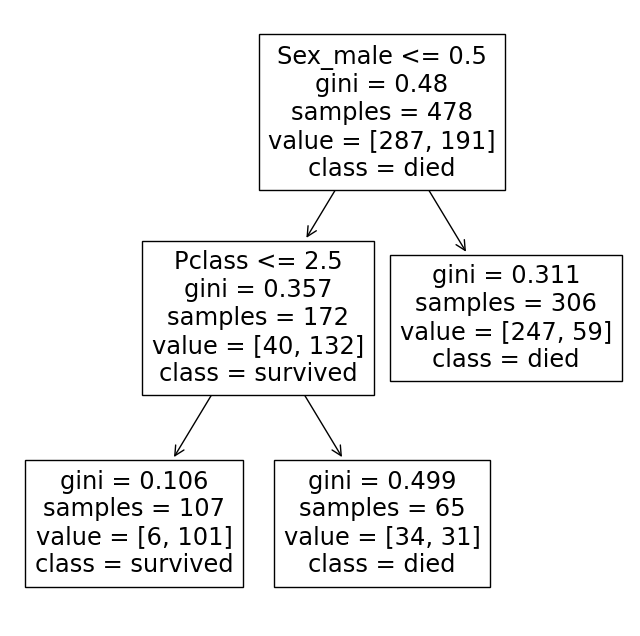

In [72]:
plt.figure(figsize=(8,8))
classnames = y.apply(lambda x: "died" if x == 0 else "survived")
tree.plot_tree(clf, feature_names=X.columns, class_names=classnames)
plt.show()

## Random Forests
Decision Trees are great, but one of the more powerful things we can do with machine learning is "ensemble learning" in which we take a ton of models, supply them with "most" of the data, train them, and then aggregate all of their findings to create a much better fitting model without "overfitting" (i.e. just memorizing) the dataset: 

![rf](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)

Let's make a random forest model: 

In [79]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)
accuracy_score(y_test, y_predicted)

0.7966101694915254

A common feature that gets used with random forests are `feature importance`. This metric can tell you which feature was most important while calculating the model itself:

In [82]:
importance_values = clf.feature_importances_
importance_values

array([0.08754239, 0.29151302, 0.0396358 , 0.03465213, 0.22546983,
       0.1372956 , 0.15212945, 0.01273247, 0.00414621, 0.01488308])

The array doesn't tell us exactly what we want, but those importances relate 1 to 1 with our input features, so let's plot them on a bar graph: 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Pclass'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'SibSp'),
  Text(3, 0, 'Parch'),
  Text(4, 0, 'Fare'),
  Text(5, 0, 'Sex_female'),
  Text(6, 0, 'Sex_male'),
  Text(7, 0, 'Embarked_C'),
  Text(8, 0, 'Embarked_Q'),
  Text(9, 0, 'Embarked_S')])

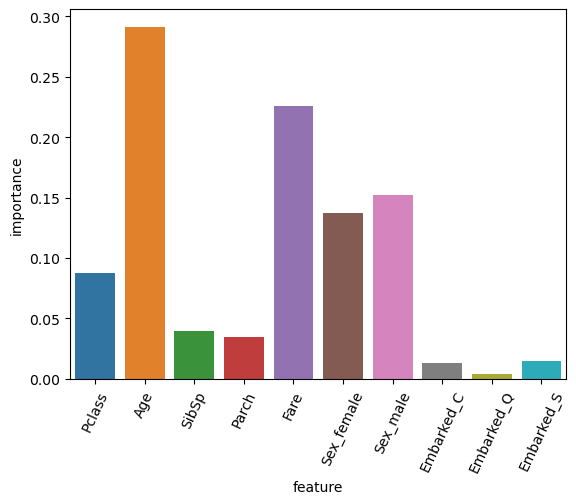

In [84]:
data = {
    "feature": X.columns,
    "importance": importance_values
}
importance_df = pd.DataFrame(data)

sns.barplot(data=importance_df, x='feature', y = 'importance')
plt.xticks(rotation=65)

Now, the above feature importances don't tell you specifically _how_ those features were useful, but just that they _were_ useful. 


## Neural Networks 

Neural networks were originally concieved of in the 1940s by Warren McCulloch and Walter Pitts. The idea was to quite literally build a circuit model of a human neuron: 

![neuron](https://askabiologist.asu.edu/sites/default/files/resources/articles/neuron_anatomy.jpg)


Artificial Neuron: 


![anneuron](https://miro.medium.com/v2/resize:fit:640/1*iaL39eI1UXwlCqnIFP5BOg.gif)


Neural networks, just like brains, string together a bunch of artificial neurons in some architectural fashion, push data through, and then compare their output to the actual truth values. The network then takes those values and "backpropogates" the information to teach the neurons how to do better next time. This happens for any number of iterations (user defined): 
![ann](https://miro.medium.com/v2/resize:fit:720/format:webp/1*sSIeU-WhsuHCQlOA00IBXg.jpeg)


In [90]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1,hidden_layer_sizes=100, max_iter=1000)
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

accuracy_score(y_test, y_predicted)

0.7627118644067796

More layers isn't always better! 

There are all sorts of neural networks out there, a famous version of neural networks created by Yan LeCunn called Convolutional Neural Networks can take image (and many other types of data) and learn very intriguing things about them.  Consider this visualizer here: 

https://adamharley.com/nn_vis/mlp/3d.html

There are a constantly increasing number of model algorithms out there for students, researchers, and, well, anyone to use to learn from! Kaggle is a fantastic resource to learn from and compete against other learners as well! 